**Дополнительное задание для работы с курсовым проектом:**

(Необязательно выполнять, но очень желательно)
Скачать данные из соревнования, пока можете работать только с train.csv. Считать их.

1. Построить график распределения целевой переменной. Сделать выводы.
3. Построить матрицу корреляций признаков и целевой переменной. Сделайте выводы.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
plt.style.use('fivethirtyeight')

In [2]:
RE = pd.read_csv('train.csv', header=0)
RE

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855


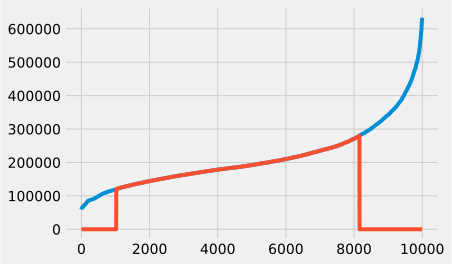

In [3]:
n=np.arange(0, 10000)
SPrice = RE.Price.sort_values()
SPrice=SPrice.reset_index()
plt.plot(SPrice.Price)
# plt.scatter(n, SPrice.Price)
SPrice_plato=SPrice
SPrice_plato[(SPrice_plato['Price'] < 120000) | (SPrice_plato['Price'] > 280000)] = 0
plt.plot(SPrice_plato.Price)
plt.show()

### на графике существет линейная область от 120к до 280к
### до 120к - парабола
### выше 280к - гипербола

2. Построить столбчатые диаграммы распределений для наиболее проблемных признаков (используйте выводы из первого ДЗ). Сделайте по ним выводы.


In [4]:
RE.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [5]:
RE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [6]:
RE.isna().sum()


Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

- **Rooms** - количество комнат

In [7]:
RE.Rooms.describe()

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

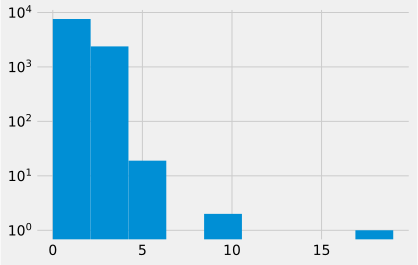

In [8]:
plt.hist(RE.Rooms, len(RE.Rooms.unique()))
plt.yscale(value='log')
plt.show()

Вывод: подавляющее большинство значений признаков находится в пределах 1-5 комнат
    Однако существуют выбросы со значениями 0 и 10 и больше.



- **Square** - площадь


In [9]:
RE.Square.describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

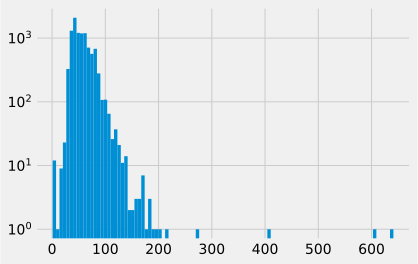

In [10]:
plt.hist(RE.Square.sort_values(), 100)
plt.yscale(value='log')
plt.show()

**Вывод**: подавляющее большинство значений признаков находится в пределах 30-200 м2
.

**Предложение:** модифицировать модель под эти входные параметры. Или разбить на две модели, если будет доставточно выборки

- **LifeSquare** - жилая площадь


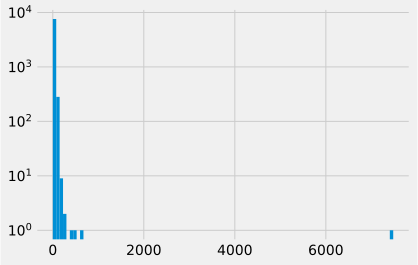

In [11]:
RE.LifeSquare.describe()

plt.hist(RE.LifeSquare.sort_values(), 100)
plt.yscale(value='log')
plt.show()


**Вывод**: Наблюдается очень большой выброс. Требуется коррекция


In [12]:
RE.LifeSquare[~RE.LifeSquare.isnull()].sort_values().tail()


357      263.542020
7010     410.639749
5183     461.463614
9229     638.163193
8000    7480.592129
Name: LifeSquare, dtype: float64

чистим выброс

8000    7480.592129

Повторяем график

/Users/coraleks/Projects/GeekBrainsAI/gb_libs_ds/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


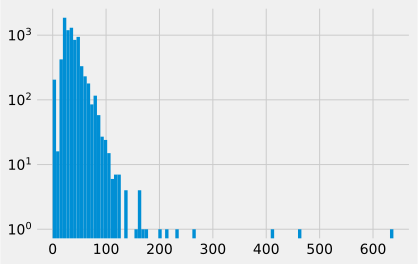

In [13]:
RE.LifeSquare[8000]=0
RE.LifeSquare[~RE.LifeSquare.isnull()].sort_values().tail()

plt.hist(RE.LifeSquare.sort_values(), 100)
plt.yscale(value='log')
plt.show()

**Вывод** Как вариант возможна модификация модели с ограничением по параметру LifeSquare < 200

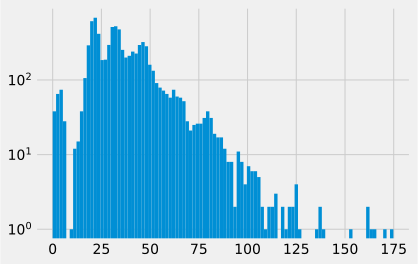

In [14]:
plt.hist(RE.LifeSquare[RE.LifeSquare < 200], 100)
plt.yscale(value='log')
plt.show()



- **KitchenSquare** - площадь кухни

In [15]:
RE.KitchenSquare.describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

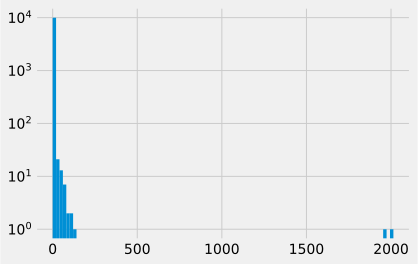

In [16]:
plt.hist(RE.KitchenSquare.sort_values(), 100)
plt.yscale(value='log')
plt.show()


**Вывод** График не показателен. Требуется корректировка

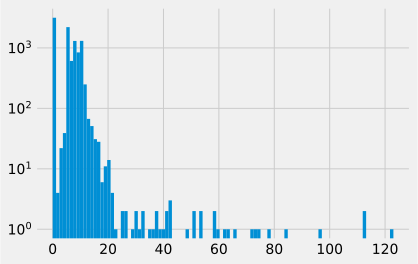

In [17]:
RE.KitchenSquare.sort_values().tail()

plt.hist(RE.KitchenSquare[RE.KitchenSquare <200 ], 100)
plt.yscale(value='log')
plt.show()


**Вывод** Возможна модификация модели или разбивка на две. Попробуем ссузить до 25

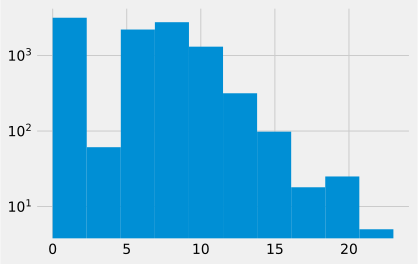

In [18]:
plt.hist(RE.KitchenSquare[RE.KitchenSquare < 25 ], 10)
plt.yscale(value='log')
plt.show()

In [19]:
RE.KitchenSquare[RE.KitchenSquare < 25 ].count()/10000*100

99.57000000000001

**Вывод** презентативность выборки сохранилась на уровне 99,57 %

- **Floor** - этаж

In [20]:
RE.Floor.describe()

count    10000.000000
mean         8.526700
std          5.241148
min          1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         42.000000
Name: Floor, dtype: float64

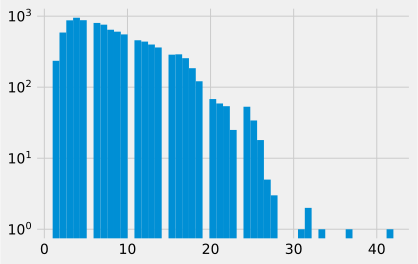

In [21]:
plt.hist(RE.Floor, 50)
plt.yscale(value='log')
plt.show()

**Вывод** сокращаем до 30

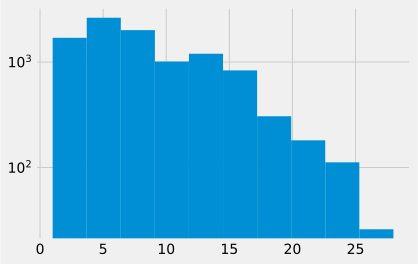

In [22]:
plt.hist(RE.Floor[RE.Floor < 30 ], 10)
plt.yscale(value='log')
plt.show()

In [23]:
RE.Floor[RE.Floor < 30 ].count()/10000*100


99.94

**Вывод** презентативность выборки сохранилась на уровне 99.94 %

